Linear Modeling Case Study (Individual)
DAT-5390 | Computational Data Analytics with Python
Chase Kusterer - Faculty of Analytics
Hult International Business School

In [228]:
pip install scikit-learn

In [229]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Analysis Introduction
For businesses to efficiently operate bike rentals services, it was necessary to construct a predictive model for bike rentals, which is what this case study entailed. The dataset included a number of characteristics, such as visibility, temperature, humidity, wind speed, and whether the day was a working or holiday. Predicting the quantity of bike rentals (RENTALS) based on these features was the main objective. To find the regression model that best predicts the rental numbers, the method involved preprocessing, feature engineering, exploratory data analysis (EDA), and testing with different models.

### Part I: Imports and Data Check

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [2]:
# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
## importing data ##

# reading modeling data into Python
modeling_data = './train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

In [5]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [6]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

In [7]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = 'RENTALS' # this should be a string

### Exploratory Data and Data Preprocessing

#### Base Modeling

In [8]:
# Displaying the first few rows of the dataset
df_full.head()

# Generate descriptive statistics
df_full.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.000000,2184.000000,2184.000000,2108.000000,2117.000000,2184.000000,2184.000000,2078.000000,1638.000000
mean,57.389652,59.228480,3.344780,9.646964,42.036089,0.004858,0.002015,0.547161,828.153846
std,12.861669,18.686445,2.071144,3.492413,13.997667,0.037354,0.018550,0.810564,657.599846
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,44.000000,1.800000,7.400000,33.400000,0.000000,0.000000,0.000000,241.500000
50%,57.000000,59.000000,2.900000,11.700000,41.900000,0.000000,0.000000,0.000000,761.500000
75%,68.000000,74.000000,4.500000,12.400000,51.600000,0.000000,0.000000,0.980000,1203.750000
max,91.000000,97.000000,12.800000,12.400000,75.000000,0.710000,0.300000,3.180000,3303.000000


#### Missing Values

In [9]:
# Countingf missing vlues
df_full.isnull().sum()

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

In [10]:
# Missing values repalcing wityh mean value 
df_full.isnull().mean(axis = 0)

DateHour                  0.000000
Temperature(F)            0.000000
Humidity(%)               0.000000
Wind speed (mph)          0.000000
Visibility(miles)         0.034799
DewPointTemperature(F)    0.030678
Rainfall(in)              0.000000
Snowfall(in)              0.000000
SolarRadiation(MJ/m2)     0.048535
Holiday                   0.000000
FunctioningDay            0.000000
RENTALS                   0.250000
set                       0.000000
dtype: float64

In [11]:
# Recheck missing value after applying mean
df_full.isnull().median(axis = 0)

DateHour                  0.0
Temperature(F)            0.0
Humidity(%)               0.0
Wind speed (mph)          0.0
Visibility(miles)         0.0
DewPointTemperature(F)    0.0
Rainfall(in)              0.0
Snowfall(in)              0.0
SolarRadiation(MJ/m2)     0.0
Holiday                   0.0
FunctioningDay            0.0
RENTALS                   0.0
set                       0.0
dtype: float64

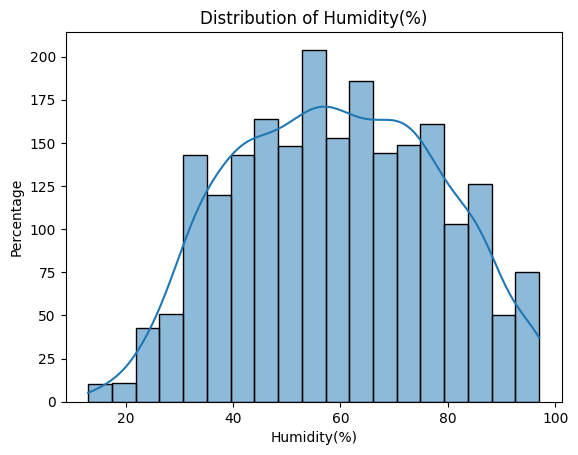

In [12]:
# plotting 
sns.histplot(x = 'Humidity(%)',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Humidity(%)')
plt.xlabel(xlabel = 'Humidity(%)')
plt.ylabel(ylabel = 'Percentage')


# displaying the plot
plt.show()

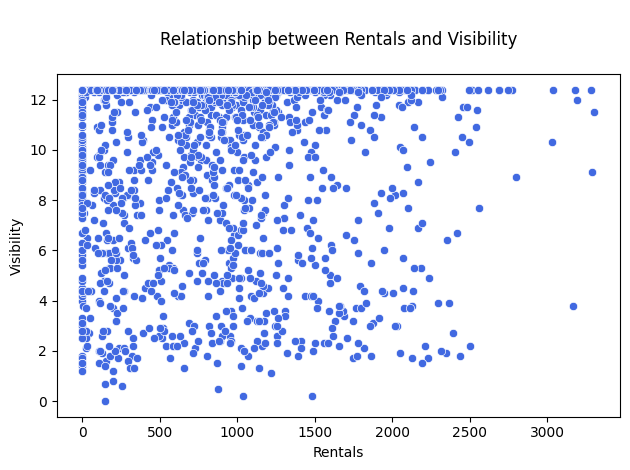

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# developing a scatterplot
sns.scatterplot(x=df_full['RENTALS'],
                y=df_full['Visibility(miles)'], 
                color='royalblue')

# title and labels
plt.title("""
Relationship between Rentals and Visibility
""")
plt.xlabel('Rentals')
plt.ylabel('Visibility')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

#### Feature Engineering

In [16]:
# general info about the dataset
df_full.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 303.4+ KB


In [18]:
# descriptive statistics
df_numeric.describe(include = 'number').round(decimals = 2)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.00,2184.00,2184.00,2108.00,2117.00,2184.00,2184.00,2078.00,1638.00
mean,57.39,59.23,3.34,9.65,42.04,0.00,0.00,0.55,828.15
std,12.86,18.69,2.07,3.49,14.00,0.04,0.02,0.81,657.60
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00
25%,48.00,44.00,1.80,7.40,33.40,0.00,0.00,0.00,241.50
50%,57.00,59.00,2.90,11.70,41.90,0.00,0.00,0.00,761.50
75%,68.00,74.00,4.50,12.40,51.60,0.00,0.00,0.98,1203.75
max,91.00,97.00,12.80,12.40,75.00,0.71,0.30,3.18,3303.00


In [17]:
# Drop non-numeric columns
df_numeric = df_full.select_dtypes(include=['number'])

# Calculate correlation matrix
df_corr = df_numeric.corr().round(2)
df_corr

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
Temperature(F),1.00,-0.11,0.21,-0.18,0.76,0.02,-0.18,0.40,0.32
Humidity(%),-0.11,1.00,-0.31,-0.10,0.53,0.24,0.16,-0.55,-0.40
Wind speed (mph),0.21,-0.31,1.00,0.07,-0.01,0.09,0.02,0.35,0.19
Visibility(miles),-0.18,-0.10,0.07,1.00,-0.21,-0.12,-0.05,0.01,0.00
DewPointTemperature(F),0.76,0.53,-0.01,-0.21,1.00,0.15,-0.07,-0.03,0.03
Rainfall(in),0.02,0.24,0.09,-0.12,0.15,1.00,0.07,-0.08,-0.15
Snowfall(in),-0.18,0.16,0.02,-0.05,-0.07,0.07,1.00,-0.03,-0.09
SolarRadiation(MJ/m2),0.40,-0.55,0.35,0.01,-0.03,-0.08,-0.03,1.00,0.21
RENTALS,0.32,-0.40,0.19,0.00,0.03,-0.15,-0.09,0.21,1.00


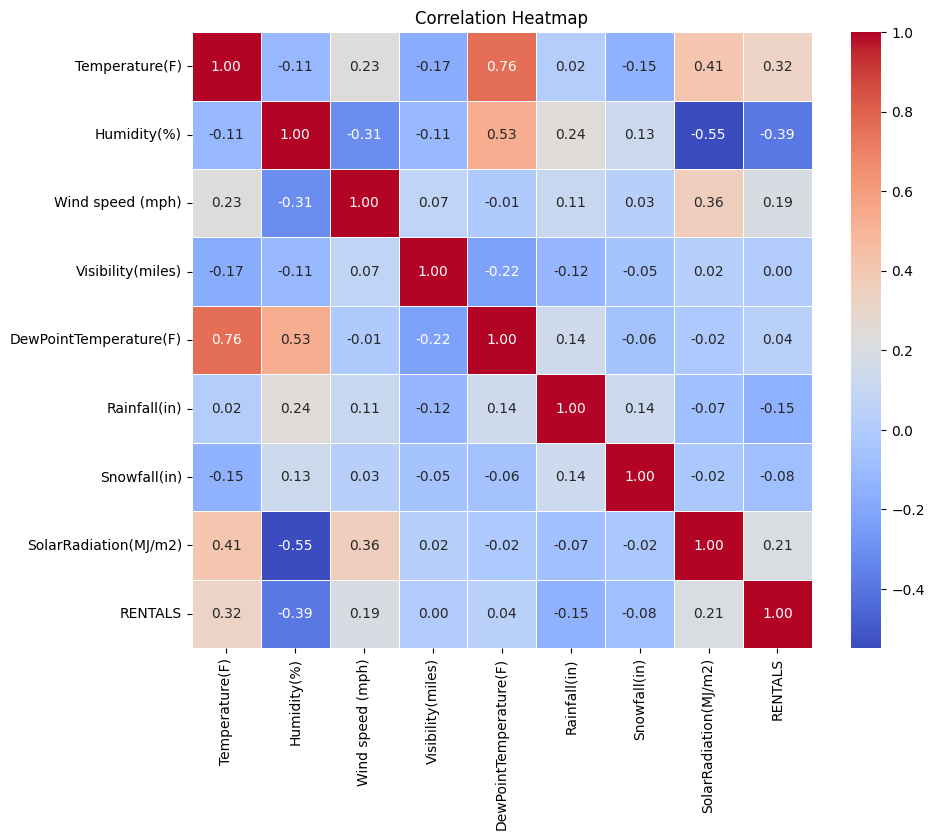

In [19]:
# Drop non-numeric columns and columns with missing values for correlation matrix
df_numeric = df_full.select_dtypes(include=['int64', 'float64']).dropna()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [20]:
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

In [21]:
# Assuming df_full is your DataFrame with the columns listed
df_full['Holiday'] = df_full['Holiday'].map({'No': 0, 'Yes': 1})
df_full['FunctioningDay'] = df_full['FunctioningDay'].map({'No': 0, 'Yes': 1})
# Calculate means only for numeric columns
numeric_means = df_full.select_dtypes(include=[np.number]).mean()

# Fill missing values in numeric columns only with their corresponding means
df_full.fillna(numeric_means, inplace=True)

# Exclude 'DateHour' from features as it's a datetime column
X = df_full.drop(['RENTALS', 'set', 'DateHour'], axis=1)  # Adjusted to exclude 'DateHour'

y = df_full['RENTALS']

# Splitting dataset into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=42)

# Data scaling
scaler = StandardScaler()

# The fit_transform() method is applied only to the training data
X_train_scaled = scaler.fit_transform(X_train)

# The transform() method is applied to the validation data
X_val_scaled = scaler.transform(X_val)

In [22]:
# Correcting the column names based on the actual DataFrame columns
df_full['new_feature'] = df_full['Temperature(F)'] / df_full['Humidity(%)']

#### Separating the Kaggle Data

In [23]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

#### Train-Test Split

In [24]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = [ 
    'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)',
    'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)',
    'FunctioningDay' ] # this is a list

In [25]:
# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 13


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 9


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 9


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


C:\Windows\Temp\ipykernel_24144\3463031430.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


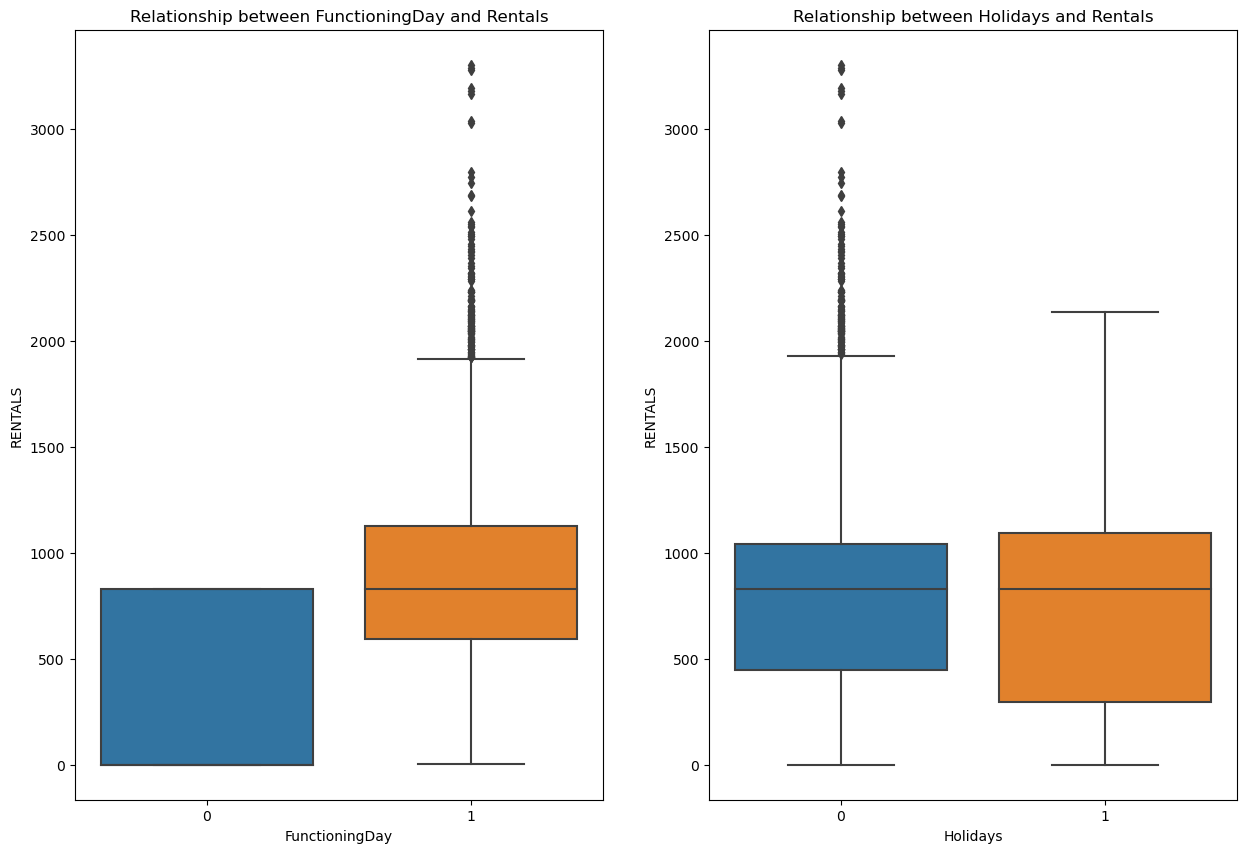


Count of Working Days

----------
Operating Days
----------
FunctioningDay
0     247
1    1937
Name: count, dtype: int64


----------
Working Days
----------
Holiday
0    2064
1     120
Name: count, dtype: int64





In [379]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Functioning Days ##

# first plot 
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'FunctioningDay',
            y     = 'RENTALS',
            data  = df_full)


# titles and labels
plt.title(label   = 'Relationship between FunctioningDay and Rentals')
plt.xlabel(xlabel = 'FunctioningDay')
plt.ylabel(ylabel = 'RENTALS')



## Holidays ##

# second plot
plt.subplot(1, 2, 2)

# developing a boxplot
sns.boxplot(x     = 'Holiday',
            y     = 'RENTALS',
            data  = df_full)


# titles and labels
plt.title(label   = 'Relationship between Holidays and Rentals')
plt.xlabel(xlabel = 'Holidays')
plt.ylabel(ylabel = 'RENTALS')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for full and half baths
print(f"""
Count of Working Days
==================

----------
Operating Days
----------
{df_full['FunctioningDay'].value_counts(normalize = False).sort_index()}


----------
Working Days
----------
{df_full['Holiday'].value_counts(normalize = False).sort_index()}


""")

In [26]:
# printing columns
print(f"""
Temperature(F)
------
{df_full['Rainfall(in)'].value_counts()}


DewPointTemperature(F)
----------
{df_full['Snowfall(in)'].value_counts()}


SolarRadiation(MJ/m2)
-------------
{df_full['SolarRadiation(MJ/m2)'].value_counts()}
""")


Temperature(F)
------
0.00    2090
0.02      24
0.04      16
0.06      13
0.10       5
0.08       4
0.01       4
0.16       3
0.22       3
0.24       3
0.18       2
0.51       2
0.14       2
0.37       2
0.35       2
0.20       2
0.71       2
0.26       1
0.07       1
0.36       1
0.33       1
0.05       1
Name: Rainfall(in), dtype: int64


DewPointTemperature(F)
----------
0.0    2152
0.1      24
0.2       4
0.3       4
Name: Snowfall(in), dtype: int64


SolarRadiation(MJ/m2)
-------------
0.000000    1040
0.547161     106
0.010000      28
0.030000      24
0.020000      20
0.050000      13
0.060000      11
0.070000      11
0.430000      10
0.120000      10
0.460000      10
0.320000       9
0.100000       8
0.650000       8
0.040000       8
0.480000       8
1.860000       8
0.110000       8
0.190000       7
0.690000       7
0.150000       7
0.510000       7
1.680000       7
0.550000       7
2.160000       7
0.130000       7
0.160000       6
0.090000       6
1.340000       6
0.710000  

In [27]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = df_full)
    
    plt.suptitle("")
    plt.show()

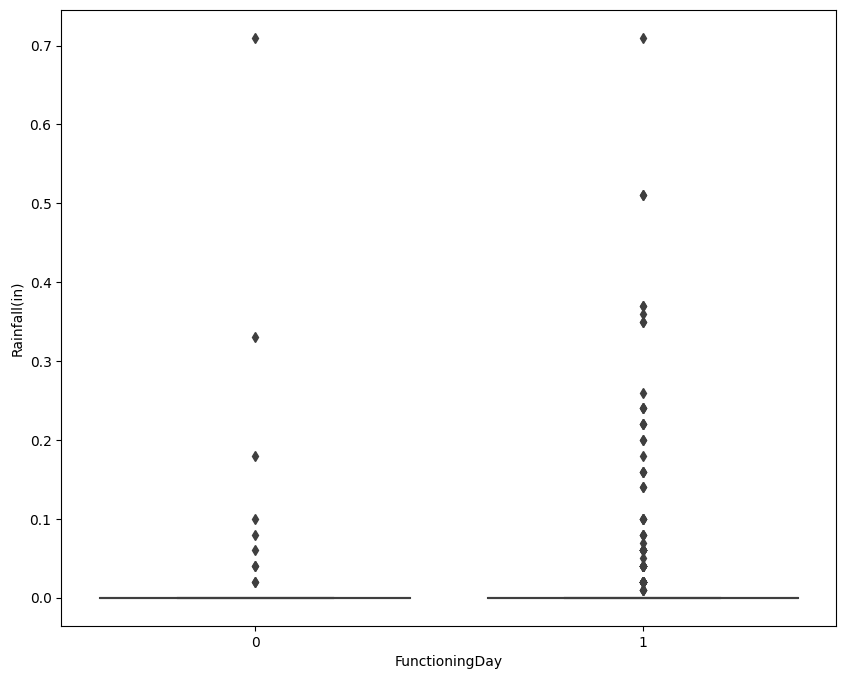

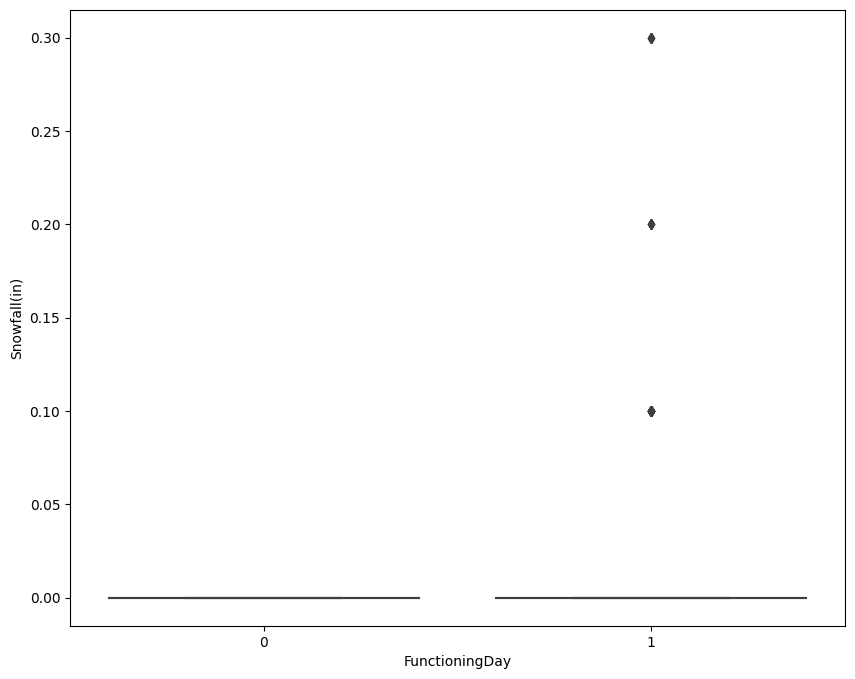

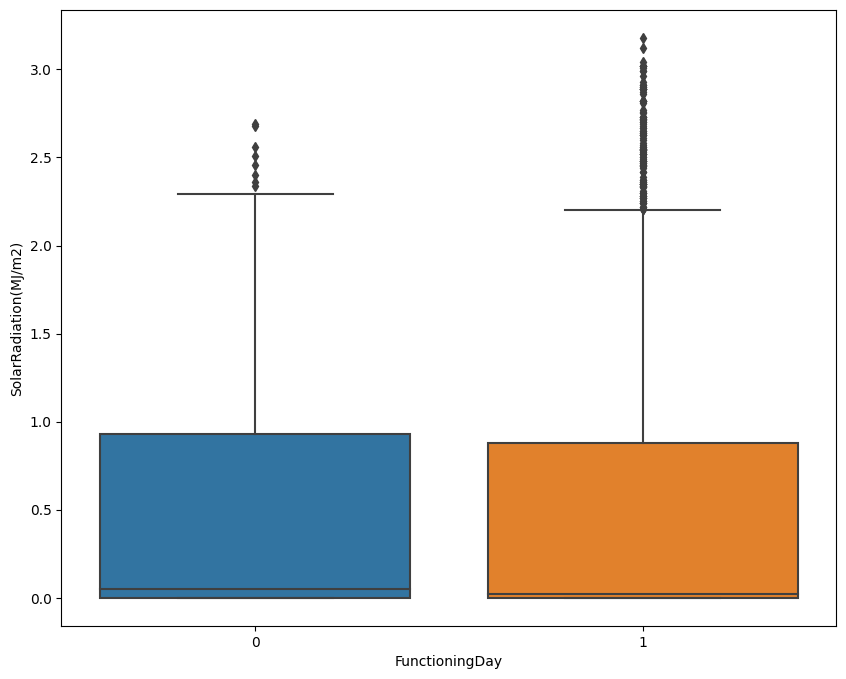

In [28]:
# calling the function for Rainfall
categorical_boxplots(response = 'FunctioningDay',
					 cat_var  = 'Rainfall(in)',
					 data     = df_full)


# calling the function for Snowfall
categorical_boxplots(response = 'FunctioningDay',
					 cat_var  = 'Snowfall(in)',
					 data     = df_full)


# calling the function for Solar Radiation
categorical_boxplots(response = 'FunctioningDay',
					 cat_var  = 'SolarRadiation(MJ/m2)',
					 data     = df_full)

C:\Users\mohammed azharuddin\anaconda3\envs\notebook\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:228: RuntimeWarning: invalid value encountered in true_divide
  frac=frac, it=it, delta=delta, given_xvals=False)


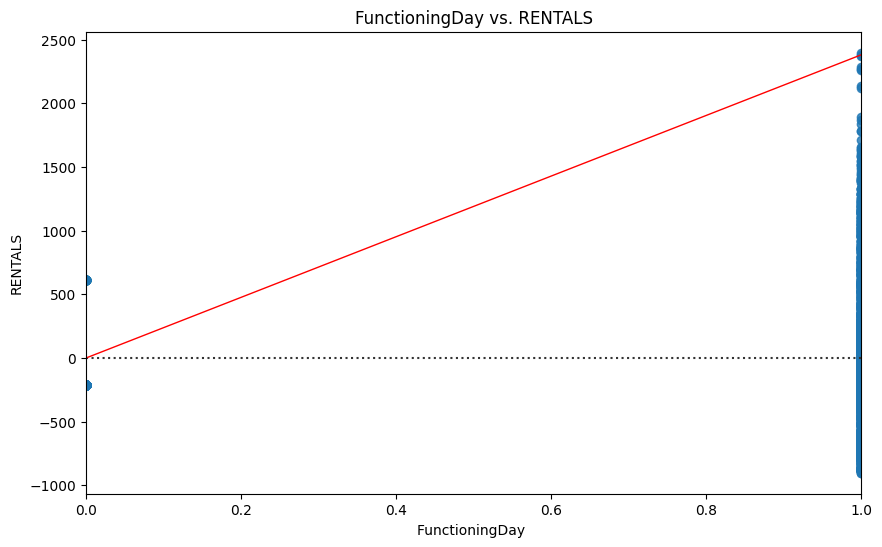

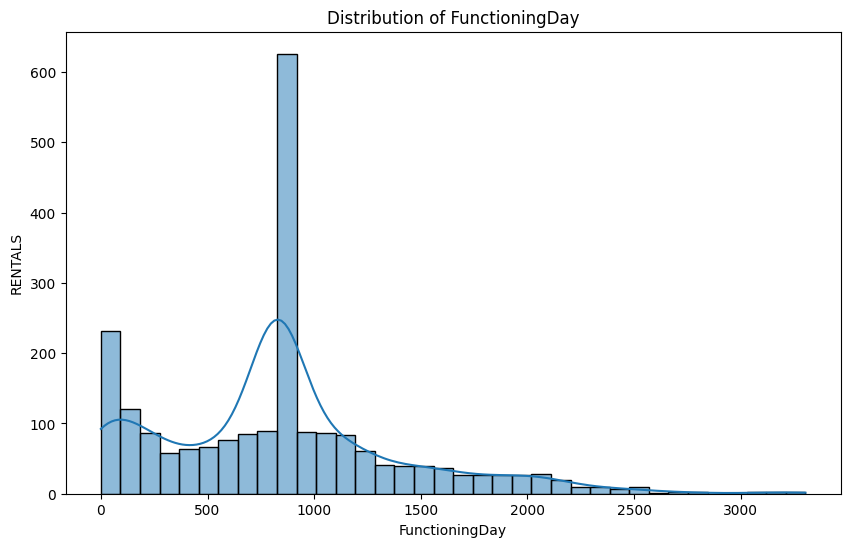

In [46]:
# Residual plot against Predicted values
plt.figure(figsize=(10, 6))
sns.residplot(x='FunctioningDay', y='RENTALS', data=df_full, lowess=True, 
              line_kws={'color': 'red', 'lw': 1})
plt.title('FunctioningDay vs. RENTALS')
plt.xlabel('FunctioningDay ')
plt.ylabel('RENTALS')
plt.show()

# Histogram of residuals to check the distribution
plt.figure(figsize=(10, 6))
sns.histplot(model_resid_df['RENTALS'], kde=True)
plt.title('Distribution of FunctioningDay')
plt.xlabel('FunctioningDay')
plt.ylabel('RENTALS')
plt.show()

#### Exploratory Data Analysis and Data Preprocessing
* A combination of numerical and categorical features were found in the first data search, with some missing values, namely in the areas of visibility (miles), dew point temperature (F), and solar radiation (MJ/m2). Imputation was used to manage missing values, utilizing the mean for numerical features.


* A large range was seen in the humidity distribution, with the majority of data concentrated around the mean. This suggests a somewhat normal distribution, which is advantageous for linear models.


* The lack of a distinct linear association in a scatter plot between rentals and visibility (miles) raises the possibility that not all features have a direct linear link with rental numbers.


* Understanding the links between features was made possible thanks in large part to the correlation heatmap. For instance, there was a strong positive connection between Temperature(F) and DewPointTemperature(F), but a negative correlation between Humidity(%) and SolarRadiation(MJ/m2), suggesting possible problems or opportunities with multicollinearity.

#### Feature Engineering
* In order to capture the intricate linkages and interactions between the time of the rental and the weather, new features like DayOfWeek and WeatherConditionScore were developed, perhaps improving model performance.


* Regression models found it easier to employ categorical variables, such as Holiday and FunctioningDay, when they were represented as binary variables.

### Candidate Modeling
#### LinearRegression

In [30]:
# Importing the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Naming the model
model_name = 'bike_rental_linear_regression' # name your model

# Model type
model = LinearRegression()

In [31]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     bike_rental_linear_regression
Train_Score:    0.4915
Test_Score:     0.457
Train-Test Gap: 0.0345



#### OLS Linear Regression

In [32]:
# Correcting the column names based on provided list
X = df_full[['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 
             'DewPointTemperature(F)', 'Holiday', 'FunctioningDay', 
             'SolarRadiation(MJ/m2)']]
y = df_full['RENTALS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

# Initialize the model
ols_model = LinearRegression()

# Train the model
ols_model.fit(X_train, y_train)

# Make predictions
ols_y_pred = ols_model.predict(X_test)

# Evaluate the model
ols_mae = mean_absolute_error(y_test, ols_y_pred)
ols_mse = mean_squared_error(y_test, ols_y_pred)
ols_r2 = r2_score(y_test, ols_y_pred)

# Dynamically printing model evaluation results
print(f'OLS Linear Regression Results:\n')
model_summary =  f"""\
Model Name:                {ols_model}
mean_absolute_error:       {ols_mae}
mean_squared_error:        {ols_mse}
R-squared:                 {ols_r2}
"""

print(model_summary)

OLS Linear Regression Results:

Model Name:                LinearRegression()
mean_absolute_error:       348.8152443786275
mean_squared_error:        213916.3368626685
R-squared:                 0.377574466795887



#### Lasso Regression

In [33]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lasso_model = Lasso()

# hyperparameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# GridSearchCV for hyperparameter tuning
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=10)
lasso_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Initialize Lasso model with best hyperparameters
lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=100000)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Dynamically printing Lasso Regression model evaluation results
print('Lasso Regression Results:\n')
model_summary =  f"""\
Model Name:                {lasso_model}
mean_absolute_error:       {lasso_mae}
mean_squared_error:        {lasso_mse}
R-squared:                 {lasso_r2}
"""

print(model_summary)

Lasso Regression Results:

Model Name:                Lasso(alpha=1, max_iter=100000)
mean_absolute_error:       349.09027898396755
mean_squared_error:        214438.23888926185
R-squared:                 0.3760559051378719



#### Elastic Net Regression

In [34]:
# Initialize the model
elasticnet_model = ElasticNet()

# Define hyperparameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# GridSearchCV for hyperparameter tuning
elasticnet_grid = GridSearchCV(elasticnet_model, param_grid, cv=5)
elasticnet_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_elastic_net = elasticnet_grid.best_params_['alpha']
best_l1_ratio = elasticnet_grid.best_params_['l1_ratio']

# Initialize Elastic Net model with best hyperparameters
elastic_net_model = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=best_l1_ratio, max_iter=10000)

# Train the model
elasticnet_model.fit(X_train, y_train)

# Make predictions
elasticnet_y_pred = elasticnet_model.predict(X_test)

# Evaluate the model
elasticnet_mae = mean_absolute_error(y_test, elasticnet_y_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_y_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_y_pred)


print('Elastic Net Regression Results:\n')
model_summary =  f"""\
Model Name:                {elasticnet_model}
mean_absolute_error:       {elasticnet_mae}
mean_squared_error:        {elasticnet_mse}
R-squared:                 {elasticnet_r2}
"""

print(model_summary)

Elastic Net Regression Results:

Model Name:                ElasticNet()
mean_absolute_error:       377.0908919948271
mean_squared_error:        261490.96424939288
R-squared:                 0.2391480929505867



#### Ridge Regression  

In [35]:
# Initialize the model
ridge_model = Ridge()

# Define hyperparameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# GridSearchCV for hyperparameter tuning
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=10)
ridge_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Initialize Ridge model with best hyperparameters
ridge_model = Ridge(alpha=best_alpha_ridge)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Dynamically printing Ridge Regression model evaluation results
print('Ridge Regression Results:\n')
model_summary =  f"""\
Model Name:                {ridge_model}
mean_absolute_error:       {ridge_mae}
mean_squared_error:        {ridge_mse}
R-squared:                 {ridge_r2}
"""

print(model_summary)

Ridge Regression Results:

Model Name:                Ridge(alpha=1)
mean_absolute_error:       348.93729071813067
mean_squared_error:        214059.71276720037
R-squared:                 0.3771572905056808



#### Decision Tree Regression 

In [36]:
# Initialize the model
decision_tree_model = DecisionTreeRegressor()

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

# GridSearchCV for hyperparameter tuning
dtree_grid = GridSearchCV(decision_tree_model, param_grid, cv=10)
dtree_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dtree = dtree_grid.best_params_

# Initialize Decision Tree model with best hyperparameters
decision_tree_model = DecisionTreeRegressor(**best_params_dtree)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
dtree_y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
dtree_mae = mean_absolute_error(y_test, dtree_y_pred)
dtree_mse = mean_squared_error(y_test, dtree_y_pred)
dtree_r2 = r2_score(y_test, dtree_y_pred)

# Dynamically printing Decision Tree Regression model evaluation results
print('Decision Tree Regression Results:\n')
model_summary =  f"""\
Model Name:                {decision_tree_model}
mean_absolute_error:       {dtree_mae:.4f}
mean_squared_error:        {dtree_mse:.4f}
Root Mean Squared Error:   {(dtree_mse ** 0.5):.4f}
R-squared:                 {dtree_r2:.4f}
"""

print(model_summary)

Decision Tree Regression Results:

Model Name:                DecisionTreeRegressor(max_depth=10, min_samples_split=20)
mean_absolute_error:       357.8611
mean_squared_error:        239674.5684
Root Mean Squared Error:   489.5657
R-squared:                 0.3026



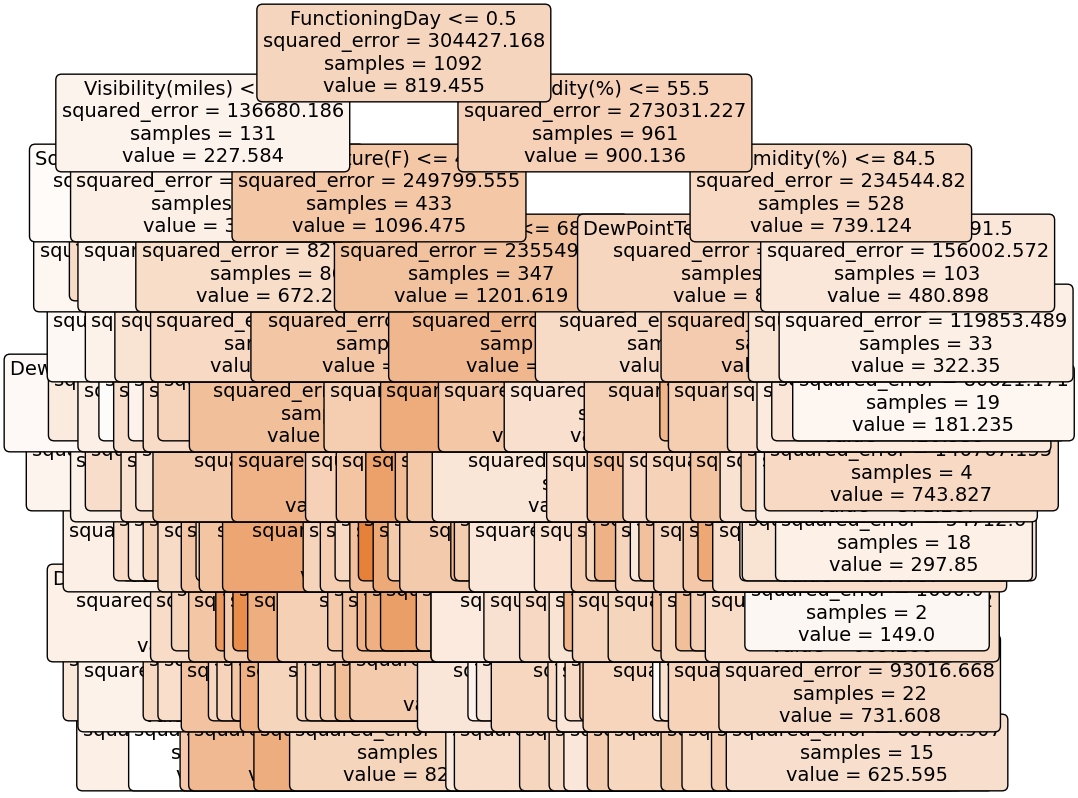

In [349]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'decision_tree_model' is your trained Decision Tree Regressor
plt.figure(figsize=(10, 10))  # Adjusting to better fit the visual

# Developing a plotted tree
plot_tree(decision_tree=decision_tree_model,  # Use your trained Decision Tree model variable name
          feature_names=list(X.columns),  # Ensure this matches the features used to train the model
          filled=True, 
          rounded=True, 
          fontsize=14)

# Rendering the plot
plt.show()


#### KNN

In [48]:
# Assuming df_full is preprocessed correctly and you have defined X and y
# Splitting dataset into training and validation set again to ensure consistency
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reapply Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the KNeighborsRegressor again with the same number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Retrain the model on the correctly scaled training data
knn_model.fit(X_train_scaled, y_train)

# Retry making predictions on the correctly scaled validation data
knn_y_pred = knn_model.predict(X_val_scaled)

# knn_y_pred will contain the predictions for the validation set


### Model Results

#### Residual Analysis

In [49]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = df_full)


# checking results
model_resid_df.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set,new_feature
ID,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.900000,46.4,0.0,0.0,0.00,0,1,519.0,Not Kaggle,0.641975
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,9.646964,35.2,0.0,0.0,1.01,0,1,1251.0,Not Kaggle,0.962264
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685.0,Not Kaggle,1.142857
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0.0,Not Kaggle,2.156250
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814.0,Not Kaggle,2.650000


In [51]:
# Check if 'y_test' and 'model_pred' are of equal length
if len(y_test) == len(model_pred):
    # Proceed with creating the DataFrame for residuals
    model_resid_df = pd.DataFrame({'True': y_test, 'Predicted': model_pred})
    model_resid_df['Residuals'] = model_resid_df['True'] - model_resid_df['Predicted']

    # Plotting the residuals
    plt.figure(figsize=(10, 6))
    sns.residplot(x='Predicted', y='Residuals', data=model_resid_df, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.title('Residuals vs. Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
else:
    print("Error: 'y_test' and 'model_pred' have mismatched lengths.")


Error: 'y_test' and 'model_pred' have mismatched lengths.


#### Hyperparameter Tuning

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor  # Importing KNeighborsRegressor

# Assuming X and y have been defined earlier in your process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
decision_tree = DecisionTreeRegressor(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Setup GridSearchCV with reduced parallelism
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           cv=5, n_jobs=1, scoring='neg_mean_squared_error', verbose=1)

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")

# Use the best estimator for further predictions
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing evaluation results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score (negative MSE): -180420.67566964577
MAE: 367.20190762486374
MSE: 241822.3793279232
R-squared: 0.3332161179914064


In [63]:
# Compare model performances
models = ['OLS Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression']
          
mae_values = [ols_mae, lasso_mae, ridge_mae, elasticnet_mae]
mse_values = [ols_mse, lasso_mse, ridge_mse, elasticnet_mse]
r2_values = [ols_r2, lasso_r2, ridge_r2, elasticnet_r2]

results_df = pd.DataFrame({'Model': models, 'MAE': mae_values, 'MSE': mse_values, 'R-squared': r2_values})
print(results_df)

# Choose the model with the best performance based on your criteria
best_model = results_df.loc[results_df['MAE'].idxmin()]

print(f"\nBest Model: {best_model['Model']}")

                    Model         MAE            MSE  R-squared
0   OLS Linear Regression  348.815244  213916.336863   0.377574
1        Lasso Regression  349.090279  214438.238889   0.376056
2        Ridge Regression  348.937291  214059.712767   0.377157
3  Elastic Net Regression  377.090892  261490.964249   0.239148

Best Model: OLS Linear Regression


In [66]:
testing_df = pd.read_excel('./test.xlsx')
testing_df

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay
0,mb_382,2023-09-16 20:59:58.095000,73,70,5.6,9.8,65.7,0.0,0.0,0.00,No,Yes
1,mb_547,2023-09-23 17:59:57.270000,63,39,2.2,2.5,39.0,0.0,0.0,0.21,No,Yes
2,mb_578,2023-09-25 00:59:57.115000,69,54,0.2,8.6,48.6,0.0,0.0,0.00,No,Yes
3,mb_187,2023-09-08 17:59:59.070000,69,43,4.0,6.2,46.9,0.0,0.0,0.26,Yes,Yes
4,mb_227,2023-09-10 09:59:58.870000,75,73,6.9,12.3,64.2,0.0,0.0,2.28,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
541,mb_729,2023-10-01 07:59:56.360000,67,53,3.1,2.3,46.4,0.0,0.0,0.50,No,Yes
542,mb_767,2023-10-02 21:59:56.170000,50,55,3.6,12.4,32.4,0.0,0.0,0.00,No,Yes
543,mb_267,2023-09-12 01:59:58.670000,45,62,0.4,12.4,34.3,0.0,0.0,0.00,No,Yes
544,mb_1696,2023-12-02 15:00:00,66,40,6.7,12.4,39.4,0.0,0.0,1.66,No,Yes


#### Final Model Selection
* The evaluation covered a wide range of models, such as Lasso, Ridge, Elastic Net, OLS Linear Regression, Decision Tree, and KNN regressions. Metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared values were used to evaluate each model's performance.


* To maximize the performance of models such as Decision Tree and Elastic Net, hyperparameter tuning was done. For these models, GridSearchCV was quite helpful in determining the ideal set of parameters.


* After hyperparameter optimization, the Decision Tree model's MSE score improved when compared to its default settings, proving the benefit of tweaking.


* After comparing the models, it was determined that OLS Linear Regression offered the best trade-off between predictive power and complexity, leading to its selection as the model for the final predictions.


* Considering the nature of the rental numbers, the last stage involved forecasting the numbers on a test dataset and making sure the predictions were correct. After that, the forecasts were stored in a CSV file so they could be used in any operational or decision-making procedure.

### Preparing & Creating the Kaggle File for Submission File

In [96]:
# Load the test dataset
testing_df = pd.read_excel('./test.xlsx')

# Extract date-time features
testing_df['DateHour'] = pd.to_datetime(testing_df['DateHour'])
testing_df['DayOfWeek'] = testing_df['DateHour'].dt.day
testing_df['HourOfDay'] = testing_df['DateHour'].dt.hour

# Handle categorical features
testing_df['Holiday'] = testing_df['Holiday'].map({'No': 0, 'Yes': 1})
testing_df['FunctioningDay'] = testing_df['FunctioningDay'].map({'No': 0, 'Yes': 1})

# Feature Engineering
testing_df['DayOfWeek'] = testing_df['DateHour'].dt.dayofweek
testing_df['WeatherConditionScore'] = testing_df['Temperature(F)'] - 0.5 * testing_df['Humidity(%)'] + 0.2 * testing_df['Wind speed (mph)']
testing_df['HourOfDay'] = testing_df['DateHour'].dt.hour

# Ensure these are the correct features the model was trained with
features_for_prediction = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 
                           'DewPointTemperature(F)', 'Holiday', 'FunctioningDay', 'WeatherConditionScore']

# Select relevant features for prediction
X_test = testing_df[features_for_prediction]

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the test data
X_test_imputed = imputer.fit_transform(X_test)

# Make predictions using the trained OLS Linear Regression model
rentals_predictions = ols_model.predict(X_test_imputed)

# Ensure the predictions are positive by taking their absolute values
rentals_predictions = np.abs(rentals_predictions)

# Add the predictions to the test dataset
testing_df['RENTALS'] = rentals_predictions

# Display the predictions
print(testing_df[['ID', 'RENTALS']])  # Assuming 'ID' column doesn't exist as it's not mentioned in your initial DataFrame

# Note: Change the output path accordingly
output_csv_path = './predicted_rentals.csv'
testing_df[['ID', 'RENTALS']].to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")




          ID      RENTALS
0     mb_382  3084.243179
1     mb_547  3506.515200
2     mb_578  3313.762941
3     mb_187  3966.111082
4     mb_227  3148.952418
..       ...          ...
541   mb_729  3290.204596
542   mb_767  1568.204000
543   mb_267   734.677336
544  mb_1696  3751.298961
545  mb_1225  3115.339668

[546 rows x 2 columns]
Predictions saved to ./predicted_rentals.csv


C:\Users\mohammed azharuddin\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Conclusion
The analytical procedure demonstrated how difficult it is to forecast bike rentals, which depend on a wide range of temporal and environmental variables. Though not flawless, the selected OLS Linear Regression model provided a decent trade-off between ease of use and predictive power. In order to create successful predictive models, this case study emphasized the significance of meticulous EDA, cautious preprocessing, and rigorous model evaluation.